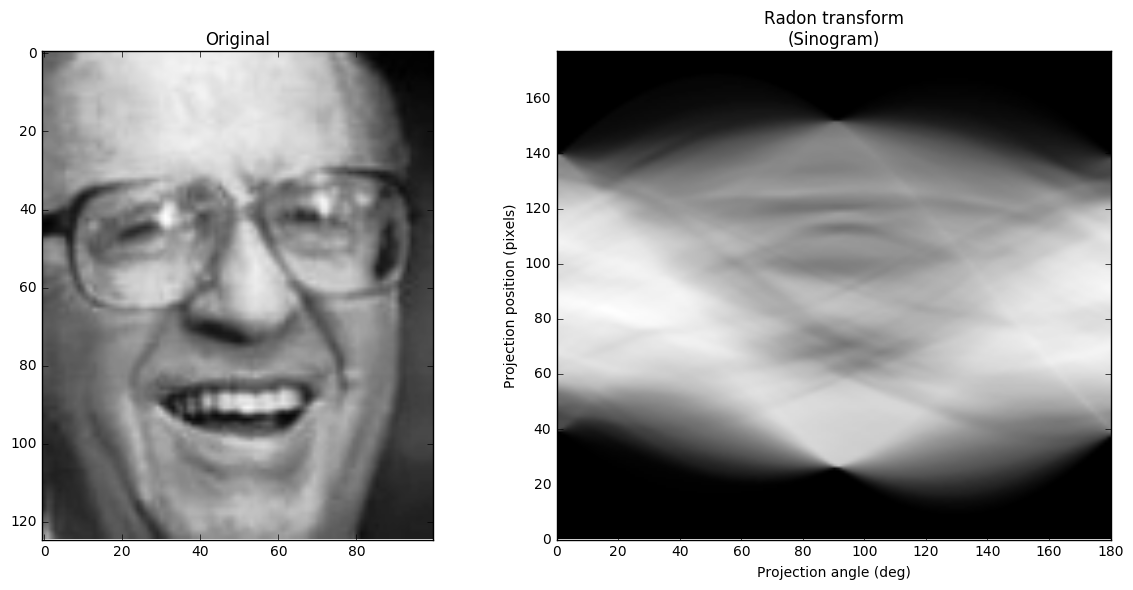

FBP rms reconstruction error: 10.2


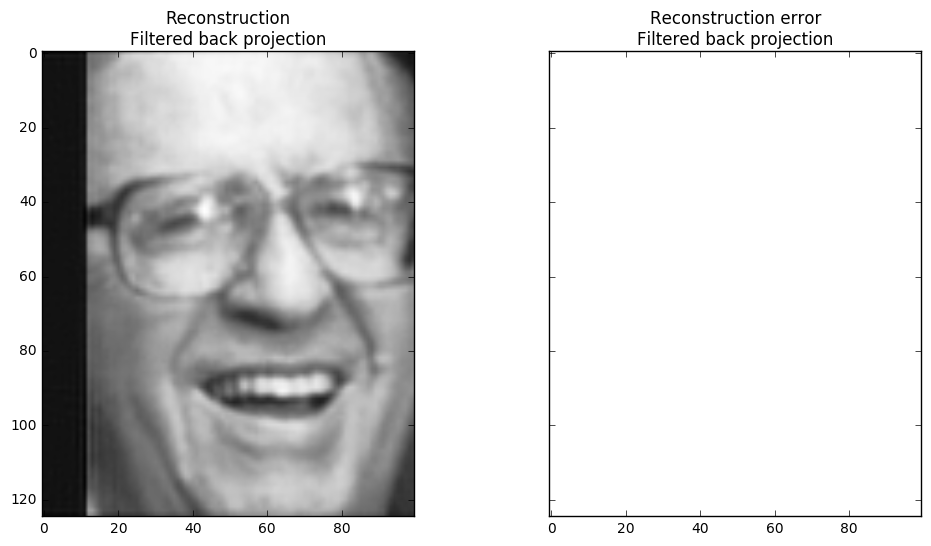

FileNotFoundError: [Errno 2] No such file or directory: 'faces/test1.jpg'

In [8]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale
from skimage.transform import iradon

def radtra(file):
    image = imread( "faces/"+file, as_grey=True)
    #image = rescale(image, scale=0.4, mode='reflect')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.set_title("Original")
    ax1.imshow(image, cmap=plt.cm.Greys_r)

    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta)
    ax2.set_title("Radon transform\n(Sinogram)")
    ax2.set_xlabel("Projection angle (deg)")
    ax2.set_ylabel("Projection position (pixels)")
    ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
               extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

    fig.tight_layout()
    plt.show()
    reconstruction_fbp = iradon(sinogram, theta=theta)
    error = image
    #error= 2
    print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error**2)))

    imkwargs = dict(vmin=-0.2, vmax=0.2)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                                   sharex=True, sharey=True,
                                   subplot_kw={'adjustable': 'box-forced'})
    ax1.set_title("Reconstruction\nFiltered back projection")
    ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
    ax2.set_title("Reconstruction error\nFiltered back projection")
    ax2.imshow(image, cmap=plt.cm.Greys_r, **imkwargs)
    plt.show()
    
    
radtra('Abba_Eban_0001.jpg')
radtra('test1.jpg')

radtra('test2.jpg')